Accuracy for Primary Rasa: 0.00%
Accuracy for Secondary Rasa: 66.67%


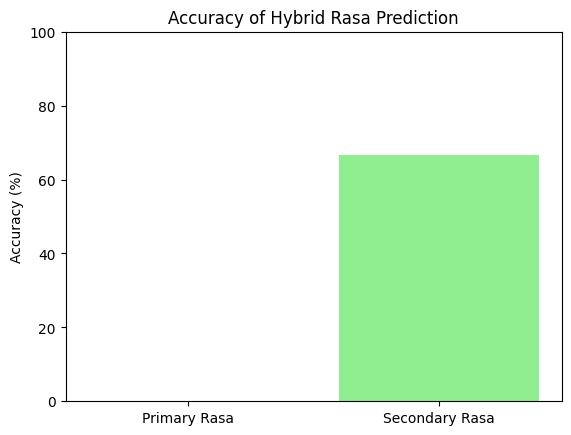

In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

# Load the data
df = pd.read_csv("dataPS.csv")
df.head()

# Prepare features and labels
features = df[['Glucose', 'Sucrose', 'Fructose', 'Tannins', 'Phenolic Acids', 'Citric', 'Malic', 'Tartaric Acid', 'Alkaloids', 'Terpenes']]
primary_rasa = df['Primary']
secondary_rasa = df['Secondary']

# Split the data into training and testing sets
features_train, features_test, primary_rasa_train, primary_rasa_test, secondary_rasa_train, secondary_rasa_test = train_test_split(
    features, primary_rasa, secondary_rasa, test_size=0.2, random_state=42
)

# Train KNN classifiers for primary and secondary rasas
knn_primary_rasa = KNeighborsClassifier(n_neighbors=5)
knn_secondary_rasa = KNeighborsClassifier(n_neighbors=5)
knn_primary_rasa.fit(features_train, primary_rasa_train)
knn_secondary_rasa.fit(features_train, secondary_rasa_train)

# Train SVM classifiers for primary and secondary rasas
svm_primary_rasa = SVC(probability=True)
svm_secondary_rasa = SVC(probability=True)
svm_primary_rasa.fit(features_train, primary_rasa_train)
svm_secondary_rasa.fit(features_train, secondary_rasa_train)

# Combine KNN and SVM using Voting Classifier
voting_primary_rasa = VotingClassifier(estimators=[
    ('knn', knn_primary_rasa),
    ('svm', svm_primary_rasa)
], voting='soft')

voting_secondary_rasa = VotingClassifier(estimators=[
    ('knn', knn_secondary_rasa),
    ('svm', svm_secondary_rasa)
], voting='soft')

voting_primary_rasa.fit(features_train, primary_rasa_train)
voting_secondary_rasa.fit(features_train, secondary_rasa_train)

# Save the hybrid models using pickle
with open(r'hybridmodel.ipynb', 'wb') as file:
    pickle.dump(voting_primary_rasa, file)
with open(r'hybridmodel.ipynb', 'wb') as file:
    pickle.dump(voting_secondary_rasa, file)

# Load the pickled hybrid models
with open(r'hybridmodel.ipynb', 'rb') as file:
    loaded_primary_model = pickle.load(file)
with open(r'hybridmodel.ipynb', 'rb') as file:
    loaded_secondary_model = pickle.load(file)

# Make predictions on the test set using the hybrid model
primary_rasa_pred = loaded_primary_model.predict(features_test)
secondary_rasa_pred = loaded_secondary_model.predict(features_test)

# Calculate accuracy scores
accuracy_primary_rasa = accuracy_score(primary_rasa_test, primary_rasa_pred) * 100
accuracy_secondary_rasa = accuracy_score(secondary_rasa_test, secondary_rasa_pred) * 100

print(f'Accuracy for Primary Rasa: {accuracy_primary_rasa:.2f}%')
print(f'Accuracy for Secondary Rasa: {accuracy_secondary_rasa:.2f}%')

# Plot a bar chart for better visualization with attractive colors
labels = ['Primary Rasa', 'Secondary Rasa']
accuracies = [accuracy_primary_rasa, accuracy_secondary_rasa]

colors = ['skyblue', 'lightgreen']

plt.bar(labels, accuracies, color=colors)
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Hybrid Rasa Prediction')
plt.show()
